In [1]:
import folium
import json
import numpy as np
from folium.features import CustomIcon
import math

In [2]:
# latitude and longitude in Chinese city
cities = {
    "Beijing": [39.906217, 116.3912757],  # 北京
    "Tianjin": [39.0856735, 117.1951073],  # 天津
    "Tangshan": [39.6295951, 118.1738712],  # 唐山
    "Shijiazhuang":[38.045474,114.502461]
    
    # "Shanghai": [31.230416, 121.473701],  # 上海
    # "Hefei": [31.8257, 117.2801],  # 合肥
    # "Suzhou": [31.3016935, 120.5810725],  # 苏州
    # "Nanjing": [32.0615513, 118.7915619],  # 南京
    # "Hangzhou": [30.2489634, 120.2052342],  # 杭州
    
    # "Guangzhou": [23.125178, 113.280637],  # 广州
    # "Shenzhen": [22.5445741, 114.0545429],  # 深圳
    # "Hongkong": [22.396428, 114.109497],  # 香港
    # "Macao": [22.198745, 113.543883],  # 澳门
    
    # "Chongqing": [29.5647398, 106.5478767],  # 重庆
    # "Chengdu": [30.5728, 104.0668],  # 成都

    # "Dalian": [38.9181714, 121.6282945],  # 大连
    # "Changchun": [43.8757057, 125.3363339],  # 长春
    # "Haerbin": [45.756967, 126.642464],  # 哈尔滨
    # "Shenyang": [41.796767, 123.429096],  # 沈阳
}

In [3]:
# define the city map
# tiles in {'OpenStreetMap', 'Stamen  Terrain', 'Stamen Toner', 'Mapbox Bright',CartoDB positron}
city_map = folium.Map(
    location=[39.906217, 116.3912757], 
    zoom_start=5, 
    tiles='CartoDB positron'
)

In [4]:
# # 自定义Stamen Terrain瓦片URL，带上你的API密钥
# stamen_terrain_url = "https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key=c84b1ee6-56b8-47e1-a989-8cc91d48ab7c"

# # 添加瓦片层
# folium.TileLayer(
#     tiles=stamen_terrain_url,
#     attr="Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.",
#     name="Stamen Terrain"
# ).add_to(city_map)

In [5]:
for city_name, location in cities.items():
    # 使用本地图片
    location_icon = CustomIcon(
    icon_image="location.png",  # 本地图片路径
    icon_size=(30, 30),  # 图标大小
    icon_anchor=(15, 15),  # 图标中心点
    popup_anchor=(0, -15)  # 弹出框位置
)
    folium.Marker(
        location,  # 使用字典中的经纬度
        popup=city_name,  # 弹出标签显示城市名称
        icon=location_icon
    ).add_to(city_map)

In [6]:
# 加载 GeoJSON 数据
with open('china_province.json', encoding='utf-8') as handle:
    country_geo = json.loads(handle.read())

# 定义要显示的地区及其对应的颜色
regions_to_display = {
    "北京市": "blue",
    "天津市": "green",
    # "上海市": "red",
    # "重庆市": "blue",
    # "香港特别行政区": "yellow",
    # "澳门特别行政区": "red",
    # "河北省": "grey",
    # "吉林省": "grey",
    # "辽宁省": "grey",
    # "黑龙江省": "grey",
    # "四川省": "grey",
    # "广东省": "grey",
    # "江苏省": "grey",
    # "安徽省": "grey",
    # "浙江省": "grey",
}

# 遍历 GeoJSON 数据，筛选并添加指定的地区
for feature in country_geo['features']:
    region_name = feature['properties']['name']
    if region_name in regions_to_display:
        # 根据地区名称获取对应的颜色
        region_color = regions_to_display[region_name]
        
        # 使用 GeoJson 添加图层，并通过 style_function 定义样式
        folium.GeoJson(
            feature,
            name=region_name,
            style_function=lambda x, color=region_color: {
                'fillColor': color,       # 填充颜色
                'color': 'gray',         # 边框颜色
                'weight': 1,              # 边框宽度
                'fillOpacity': 0.15        # 填充透明度
            }
        ).add_to(city_map)

In [7]:
# 加载 GeoJSON 数据
with open('china_city.json', encoding='utf-8') as handle:
    country_geo = json.loads(handle.read())

# 定义要显示的地区及其对应的颜色
regions_to_display = {
    "唐山市": "red","石家庄市":"yellow", 
    "秦皇岛市":"grey", "邯郸市":"grey", "邢台市":"grey","保定市":"grey",
    "张家口市":"grey","承德市":"grey","沧州市":"grey","廊坊市":"grey","衡水市":"grey",
    
    # "杭州市": "purple",
    # "温州市": "grey","嘉兴市": "grey","湖州市": "grey","绍兴市": "grey","金华市": "grey",
    # "衢州市": "grey","舟山市": "grey","台州市": "grey","丽水市": "grey","宁波市": "grey",
    
    # "苏州市": "green","南京市": "orange",
    # "无锡市": "grey","徐州市": "grey","常州市": "grey","南通市": "grey","连云港市": "grey",
    # "淮安市": "grey","盐城市": "grey","扬州市": "grey","镇江市": "grey","泰州市": "grey","宿迁市": "grey",
    
    # "合肥市": "blue",
    # "芜湖市": "grey","蚌埠市": "grey","淮南市": "grey","淮北市": "grey","马鞍山市": "grey",
    # "铜陵市": "grey","安庆市": "grey","黄山市": "grey","阜阳市": "grey","宿州市": "grey",
    # "滁州市": "grey","六安市": "grey","宣城市": "grey","池州市": "grey","亳州市": "grey",
    
    # "广州市": "blue",
    # "深圳市": "green",
    # "珠海市":"grey","汕头市":"grey","佛山市":"grey","韶关市":"grey","湛江市":"grey","肇庆市":"grey",
    # "江门市":"grey","茂名市":"grey","惠州市":"grey","梅州市":"grey","汕尾市":"grey","河源市":"grey","阳江市":"grey",
    # "清远市":"grey","东莞市":"grey","中山市":"grey","潮州市":"grey","揭阳市":"grey","云浮市":"grey",

    # "成都市": "red",
    # "绵阳市":"grey","自贡市":"grey","攀枝花市":"grey","泸州市":"grey","德阳市":"grey","广元市":"grey",
    # "遂宁市":"grey","内江市":"grey","乐山市":"grey","资阳市":"grey","宜宾市":"grey","南充市":"grey",
    # "达州市":"grey","雅安市":"grey","广安市":"grey","巴中市":"grey","眉山市":"grey",
    # "阿坝藏族羌族自治州":"grey","甘孜藏族自治州":"grey","凉山彝族自治州":"grey",
    
    # "哈尔滨市": "blue",
    # "齐齐哈尔市":"grey","牡丹江市":"grey","佳木斯市":"grey","七台河市":"grey","大兴安岭地区":"grey",
    # "大庆市":"grey","黑河市":"grey","绥化市":"grey","伊春市":"grey","鹤岗市":"grey","双鸭山市":"grey","鸡西市":"grey",
    
    # "长春市": "yellow",
    # "吉林市":"grey","四平市":"grey","辽源市":"grey","通化市":"grey","白山市":"grey","松原市":"grey","白城市":"grey","延边朝鲜族自治州":"grey",
    
    # "沈阳市": "red",
    # "大连市": "green",
    # "鞍山市":"grey","抚顺市":"grey","本溪市":"grey","丹东市":"grey","锦州市":"grey","营口市":"grey",
    # "阜新市":"grey","辽阳市":"grey","铁岭市":"grey","朝阳市":"grey","盘锦市":"grey","葫芦岛市":"grey",
}

# 遍历 GeoJSON 数据，筛选并添加指定的地区
for feature in country_geo['features']:
    region_name = feature['properties']['name']
    if region_name in regions_to_display:
        # 根据地区名称获取对应的颜色
        region_color = regions_to_display[region_name]
        
        # 使用 GeoJson 添加图层，并通过 style_function 定义样式
        folium.GeoJson(
            feature,
            name=region_name,
            style_function=lambda x, color=region_color: {
                'fillColor': color,       # 填充颜色
                'color': 'gray',         # 边框颜色
                'weight': 1,              # 边框宽度
                'fillOpacity': 0.15        # 填充透明度
            }
        ).add_to(city_map)

In [8]:
# Haversine 公式函数
def haversine(coord1, coord2):
    # 地球半径（单位：公里）
    R = 6371.0
    
    # 将经纬度转换为弧度
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
    
    # 纬度和经度的差值
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine 公式
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return distance

In [9]:
# # 京津冀
# specific_path = [
#     cities["Beijing"],
#     cities["Tianjin"],
#     cities["Tangshan"],
#     cities["Beijing"]
# ]

# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)

# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
#     mid_point = [
#         (start_point[0] + end_point[0]) / 2,  # 纬度平均值
#         (start_point[1] + end_point[1]) / 2   # 经度平均值
#     ]
#     plane_icon = CustomIcon(
#         icon_image="paper-plane.png",
#         icon_size=(30, 30),
#         icon_anchor=(15, 15),
#         popup_anchor=(0, -15)
#     )
#     folium.Marker(
#         location=mid_point,
#         icon=plane_icon
#     ).add_to(city_map)

In [10]:
# # 东北三省
# specific_path = [
#     cities["Haerbin"],
#     cities["Changchun"],
#     cities["Shenyang"],
#     cities["Dalian"]
# ]
# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)

In [11]:
# # 长三角
# specific_path = [
#     cities["Hefei"],
#     cities["Nanjing"],
#     cities["Suzhou"],
#     cities["Shanghai"],
#     cities["Hangzhou"],
#     cities["Suzhou"],
#     cities["Hangzhou"],
#     cities["Nanjing"]
# ]
# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)

In [12]:
# # 川渝
# specific_path = [
#     cities["Chengdu"],
#     cities["Chongqing"]
# ]
# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)

In [13]:
# # 粤港澳大湾区
# specific_path = [
#     cities["Macao"],
#     cities["Guangzhou"],
#     cities["Shenzhen"],
#     cities["Hongkong"],
#     cities["Macao"],
#     cities["Shenzhen"]
# ]
# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)


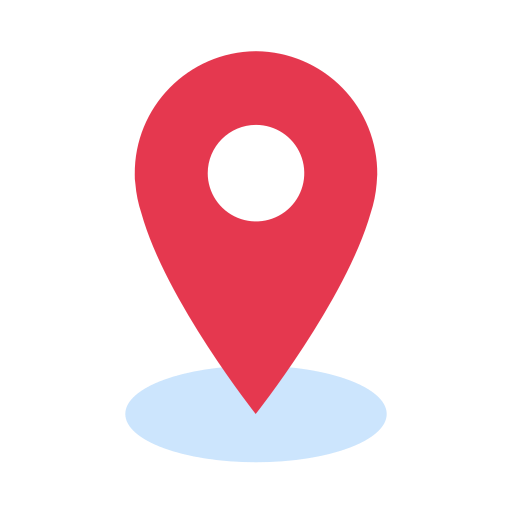
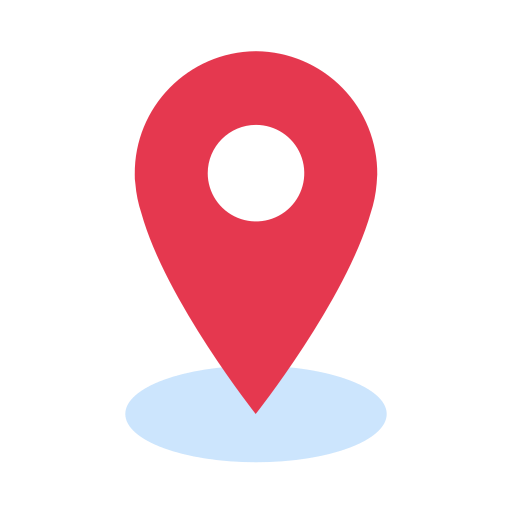
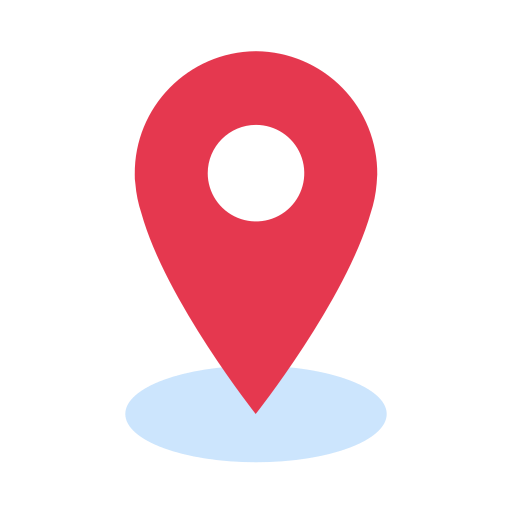
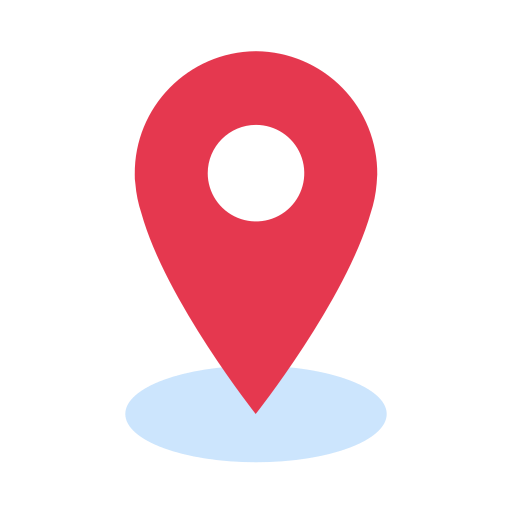

In [14]:
# 在地图中添加经纬度, add latitude and longitude in the map when click
city_map.add_child(folium.LatLngPopup())

In [15]:
city_map.save("1_.html")